In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data = pd.read_csv('/content/drive/My Drive/data/hanoi_quality.csv', index_col='date')

In [32]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,76,1,15,36,7,7
3/2/2019,117,64,4,28,3,5
3/3/2019,10,64,1,22,16,5
3/4/2019,118,56,13,22,14,6
3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...
5/28/2024,85,56,14,1,8,6
5/29/2024,58,50,13,1,8,6
5/30/2024,47,39,10,1,8,8


In [33]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [34]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0243 - val_loss: 0.0297
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0279
Epoch 3/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0255
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0281
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0270
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0280
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0257
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0273
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0277
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0258

In [38]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.38604651 0.26046512 0.20930233 0.21395349 0.44651163]
Predict value:
6/6 [==============================] - 0s 2ms/step
[[0.5417166 ]
 [0.57938534]
 [0.17236204]
 [0.7462727 ]
 [0.62002325]
 [0.4972096 ]
 [0.66871274]
 [0.72017795]
 [0.3311817 ]
 [0.51638836]
 [0.37981284]
 [0.2533338 ]
 [0.46478432]
 [0.5149911 ]
 [0.56251764]
 [0.5326312 ]
 [0.4144867 ]
 [0.29724354]
 [0.38279045]
 [0.40818018]
 [0.2864525 ]
 [0.42551577]
 [0.35685998]
 [0.37752295]
 [0.2997507 ]
 [0.42700684]
 [0.27940744]
 [0.33818537]
 [0.36888123]
 [0.39093614]
 [0.41589135]
 [0.4968109 ]
 [0.25609565]
 [0.3044759 ]
 [0.32179153]
 [0.3379705 ]
 [0.3199877 ]
 [0.59933764]
 [0.5983741 ]
 [0.71764874]
 [0.22157858]
 [0.23904908]
 [0.3956067 ]
 [0.6356332 ]
 [0.5038202 ]
 [0.49396348]
 [0.30569345]
 [0.36631382]
 [0.43622935]
 [0.21765086]
 [0.20654087]
 [0.37402737]
 [0.46523732]
 [0.44558144]
 [0.4326836 ]
 [0.5187548 ]
 [0.23452462]
 [0.46777362]
 [0.25018317]
 [0.4520663 ]
 [0.33065498]
 [0.49619

In [39]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 1ms/step


0.24096898849656906

In [40]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.10227285183243293
MAPE: 6940476487377.975
MAE: 0.07222736250347896


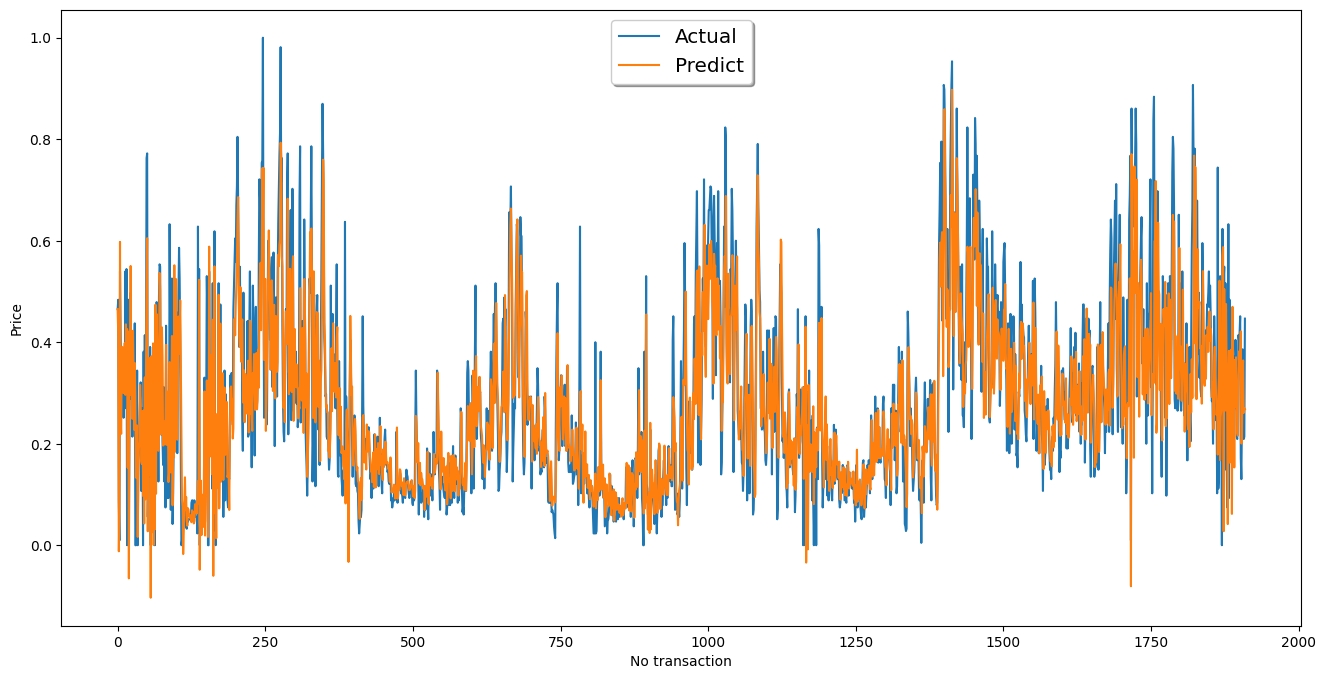

In [42]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [43]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 22ms/step
Next 90 days PM2.5 predictions: [59.58741  53.0637   54.682316 56.63913  56.27412  50.50803  51.71139
 51.734615 49.939144 47.415394 48.045452 47.874855 46.76429  46.044956
 45.827442 45.121838 44.152927 43.226685 42.26616  41.448753 40.742496
 40.11047  39.51233  38.93494  38.322968 37.711323 37.125748 36.58051
 36.10067  35.69176  35.32459  34.977707 34.64073  34.310642 33.990574
 33.688457 33.425167 33.202778 33.003334 32.79398  32.629    32.50177
 32.38998  32.284706 32.18756  32.1004   32.020535 31.946264 31.879324
 31.822157 31.773174 31.729485 31.689924 31.65445  31.622576 31.593569
 31.56726  31.543856 31.523298 31.505123 31.488886 31.46861  31.445747
 31.423546 31.402994 31.382872 31.363235 31.34472  31.326612 31.308512
 31.290604 31.27296  31.255388 31.238043 31.221188 31.20473  31.188528
 31.172619 31.15703  31.141674 31.126535 31.111664 31.097057 31.082699
 31.068596 31.054756 31.041159 31.027794 31.014658 31.001747]


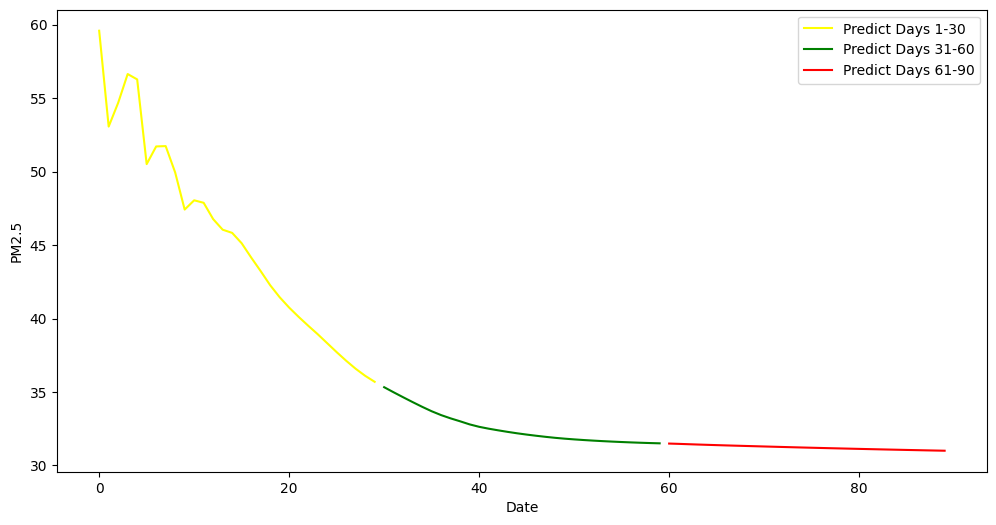

In [44]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()